In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import json, re
from unittest import mock
import sys
sys.path.append('/Users/krishansubudhi/repos/prepareai')
import tool
import importlib
importlib.reload(tool)
# Step 2: Load the data into a DataFrame
filename = 'training_data_log1.jsonl'  # Replace with your actual file name
df = pd.read_json(filename, lines=True)

# Step 3: Analyze the data
# Basic Data Exploration
print("DataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   prompt     43 non-null     object        
 1   code       43 non-null     object        
 2   timestamp  43 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.1+ KB


Number of prompts containing the keyword 'learning': 43


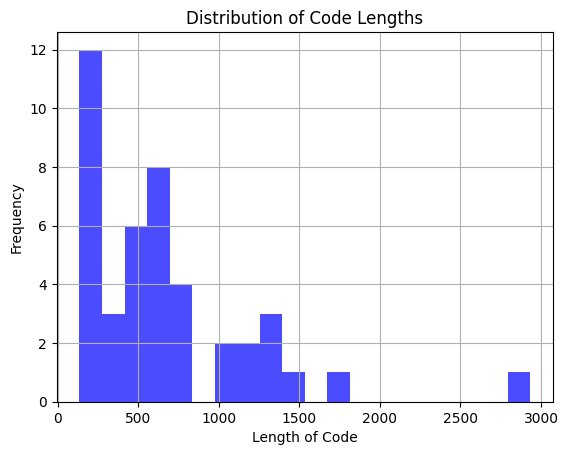

In [2]:
# Example: Count occurrences of a specific keyword in 'prompt'
keyword = 'learning'
keyword_count = df['prompt'].str.contains(keyword, case=False).sum()
print(f"Number of prompts containing the keyword '{keyword}': {keyword_count}")

# Example: Plot the distribution of code lengths
df['code_length'] = df['code'].apply(len)
df['code_length'].hist(bins=20, color='blue', alpha=0.7)
plt.title("Distribution of Code Lengths")
plt.xlabel("Length of Code")
plt.ylabel("Frequency")
plt.show()



In [66]:
index = 24
print(df.iloc[index].prompt)
print("=========")
print(df.iloc[index].code)



You are an AI Teacher guiding a student toward their goals. Prepare customized plans, track their progress and skills, and personalize your responses using humor, challenges, and appreciation based on their personality ,goal and progreass.

# Tools Available:
- 'MemoryManager':

    A class to manage in-memory short key-value pairs along with their update timestamps.
    
    
    * `get_memory(key: str) -> str` 	# Retrieves the value associated with a given key from memory.
    
    * `get_memory_snapshot() -> str` 	# Retrieves a formatted snapshot of the memory, showing keys, values and the time elapsed since their last update.
    
    * `update_memory(key: str, value: str) -> None` 	# Updates the memory with a new short key-value pair. Make sure values are less than 200 characters.

- 'MCQExaminer':

    * `get_question(subject: str, difficulty: str) -> str` 	# Get an MCQ question based on the subject and difficulty level.
    
    * `grade_answer(question: str, answer: str) -> st

In [67]:
new_code = \
'''```python
# Getting resource suggestions for the Introduction to Machine Learning
resources = (
    "Regarding resources, you'll have everything you need here, from concept understanding to practice problems. "
    "Your progress will be tracked as you move ahead in the course. Still, if you want to explore more resources, "
    "here are some recommendations:\n"
    "- **Online Courses**: Coursera's 'Machine Learning' by Andrew Ng, edX's 'Introduction to Artificial Intelligence'.\n"
    "- **Books**: 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow' by Aurélien Géron, 'Pattern Recognition and Machine Learning' by Christopher Bishop.\n"
    "- **YouTube Channels**: 3Blue1Brown (for math concepts), StatQuest (for statistics and ML algorithms).\n"
    "- **Websites**: Towards Data Science blog on Medium for articles and tutorials."
)

# Responding to the user with the suggested resources
self.tools['Responder'].respond(
    f"'Introduction to Machine Learning' is not part of the learning plan. Do you want me to add it to the plan?\n\n{resources}"
)

# Updating memory with the current topic
self.tools['MemoryManager'].update_memory('current_topic', 'Introduction to Machine Learning')

# Teaching the student about the Introduction to Machine Learning
self.tools['Concept'].teach(
    topic="Introduction to Machine Learning",
    context="Student tends to wander while studying; needs tips for focus."
)
```'''

data_entry = {
            "prompt": df.iloc[index].prompt,
            "code": new_code,
        }


# Serialize the dictionary to a JSON string
data_line = json.dumps(data_entry)
# Append the JSON string to the log file
with open("training_data_fixed.jsonl", "a") as log_file:
    log_file.write(data_line + "\n")

# Verification

In [61]:
import os
tool.tools = mock.MagicMock()
# with open("training_data_fixed.jsonl", "r") as log_file:
#     for i, line in enumerate(log_file.readlines()):
#         data = json.loads(line)
#         directory = f"labeled_data/{i+1}"
#         # os.makedirs(directory)
#         os.remove(f"{directory}/code.py")
#         with open(f"{directory}/prompt.md", 'w') as f:
#             f.write(data['prompt'])
#         with open(f"{directory}/code.md", 'w') as f:
#             f.write(data['code'])

for dir in os.listdir("labeled_data"):
    display(Markdown(f"# Example {dir}"))
    code = open(f"labeled_data/{dir}/code.md", 'r').read()
    # display(Markdown(code))
    code = code.replace("self.","")
    # display(Markdown(code))
    tool.Tool._execute_code(code)

# Example 9

```python
# Updating memory to mark the student's readiness for an advanced task.
tools['MemoryManager'].update_memory('preference_arrays_and_strings_difficulty', 'advanced')

# Getting a more challenging coding question based on arrays and strings.
coding_question = tools['CodingPracticeTutor'].get_question(topic='arrays_and_strings', difficulty='advanced')

# Responding with the new challenge for the student.
tools['Responder'].respond(f"Alright, here's a challenge for you:\
\
{coding_question}\
\
Ready to take this on? Let me know if you need any hints or have questions!")
```

# Example 11

```python
question = """### Problem: Longest Substring Without Repeating Characters

Given a string, find the length of the longest substring without repeating characters.

#### Example

**Input:**
```
s = "abcabcbb"
```
**Output:**
```
3
```
**Explanation:**
The answer is "abc", with the length of 3.

**Input:**
```
s = "bbbbb"
```
**Output:**
```
1
```
**Explanation:**
The answer is "b", with the length of 1.

**Input:**
```
s = "pwwkew"
```
**Output:**
```
3
```
**Explanation:**
The answer is "wke", with the length of 3.
Note that the answer must be a substring, "pwke" is a subsequence and not a substring.

#### Constraints
- `0 <= s.length <= 5 * 10^4`
- `s` consists of English letters, digits, symbols, and spaces.

#### Function Signature
```python
def length_of_longest_substring(s: str) -> int:
```

#### Notes
- You can solve this using sliding window technique or hash maps.
- Focus on optimizing the solution to handle large input sizes efficiently.
"""

hint = tools['CodingPracticeTutor'].provide_hint(question = question)

tools['Responder'].respond(f"Here is a hint for you. Can you try now? \n{hint}")
```

# Example 7

```python
# Updating the memory with the student's preference for array and string difficulty.
tools['MemoryManager'].update_memory(key="preference_arrays_and_strings_difficulty", value="intermediate")

# Retrieve an intermediate-level coding question on array manipulation.
advanced_array_question = tools['CodingPracticeTutor'].get_question(
    topic="array manipulation in Python",
    difficulty="intermediate"
)

# Respond with the intermediate-level question and offer hints if needed.
tools['Responder'].respond(
    f"Since you have a basic understanding of array manipulation, let's challenge you with an intermediate-level question.\
\
{advanced_array_question}\
\
Can you solve this? Let me know if you need hints."
)
```

# Example 6

```python
# Fetch the demo concept for inserting 10 at position 2 of the array.
concept = tools['ConceptTutor'].teach(
    topic="Insert 10 at position 2 of [1, 2, 3, 4]"
)

# Respond with the demo concept explanation.
tools['Responder'].respond(
    f"Alright, here's a simple demo:\
\
{concept}"
)

# Prompt to see if the student is ready to move on to other array and string manipulation concepts.
tools['Responder'].respond(
    "Simple, isn't it? Next, we can explore more concepts such as array deletion and string operations like concatenation and substrings. Are you ready to dive into these topics?"
)
```

# Example 1

```python
tools['Responder'].respond("Hello there! What subject or skill are you aiming to improve? Let's set some goals to get started.")
```

# Example 10

```python
question = """### Problem: Longest Substring Without Repeating Characters

Given a string, find the length of the longest substring without repeating characters.

#### Example

**Input:**
```
s = "abcabcbb"
```
**Output:**
```
3
```
**Explanation:**
The answer is "abc", with the length of 3.

**Input:**
```
s = "bbbbb"
```
**Output:**
```
1
```
**Explanation:**
The answer is "b", with the length of 1.

**Input:**
```
s = "pwwkew"
```
**Output:**
```
3
```
**Explanation:**
The answer is "wke", with the length of 3.
Note that the answer must be a substring, "pwke" is a subsequence and not a substring.

#### Constraints
- `0 <= s.length <= 5 * 10^4`
- `s` consists of English letters, digits, symbols, and spaces.

#### Function Signature
```python
def length_of_longest_substring(s: str) -> int:
```

#### Notes
- You can solve this using sliding window technique or hash maps.
- Focus on optimizing the solution to handle large input sizes efficiently.
"""

answer = """def length_of_longest_substring(s: str) -> int:
    longest_substr_len = 0
    current_substr_len = 0
    current_substr_chars = set()
    for c in s:
if c in current_substr_chars:
    continue
else:
    current_substr_len += 1
    longest_substr_len = max(longest_substr_len, current_substr_len)
    current_substr_chars.add(c)
    return longest_substr_len"""

grader_response = tools['CodingPracticeTutor'].grade_answer(question = question, answer = answer)

tools['Responder'].respond({grader_response})

# Process the new grading output with the AITeacher tool.
tools['AITeacher'].process(
    input_text="AITeacher(thought): I have asked grader to grade student's response. Process the report and respond.",
    additional_info={'grader_response': grader_response}
)
```

# Example 8

```python
question = "Insert the number 20 at position 3 in the array [5, 6, 7, 8]"
answer = """```python
array = [5, 6, 7, 8]
array.insert(3, 20)
print(array)
```"""

# Grade the answer using the CodingPracticeTutor tool.
response = tools['CodingPracticeTutor'].grade_answer(
    question=question,
    answer=answer
)

# Respond to the student with the grading result.
tools['Responder'].respond(response)

# Process the grading output with the AITeacher tool for further analysis.
tools['AITeacher'].process(
    input_text="AITeacher(thought): I have asked the grader to grade the output. Process the output and respond.",
    additional_info={'grader_response': response}
)

```

# Example 4

```python
tools['Responder'].respond("Awesome! Let's kick off with Arrays and Strings. How about we start with a practical example? I'll demonstrate how to manipulate an array by inserting and deleting elements. Once you're comfortable, you'll try it out your Ready to begin?")
```

# Example 15

```python
# Getting resource suggestions for the Introduction to Machine Learning
resources = (
    "Regarding resources, you'll have everything you need here, from concept understanding to practice problems. "
    "Your progress will be tracked as you move ahead in the course. Still, if you want to explore more resources, "
    "here are some recommendations:\n\n"
    
    "- **Online Courses**: Coursera's 'Machine Learning' by Andrew Ng, edX's 'Introduction to Artificial Intelligence'.\n"
    "- **Books**: 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow' by Aurélien Géron, "
    "'Pattern Recognition and Machine Learning' by Christopher Bishop.\n"
    "- **YouTube Channels**: 3Blue1Brown (for math concepts), StatQuest (for statistics and ML algorithms).\n"
    "- **Websites**: Towards Data Science blog on Medium for articles and tutorials."
)


# Responding to the user with the suggested resources
tools['Responder'].respond(
    f"'Introduction to Machine Learning' is not part of the learning plan. Do you want me to add it to the plan?\
\
{resources}"
)

# Updating memory with the current topic
tools['MemoryManager'].update_memory('current_topic', 'Introduction to Machine Learning')

# Teaching the student about the Introduction to Machine Learning
concept = tools['Concept'].teach(
    topic="Introduction to Machine Learning",
    context="Student tends to wander while studying; needs tips for focus."
)
tools['Responder'].respond(concept)
```

# Example 3

```python
# Lock the suggested learning plan
tools['LearningPlanManager'].lock_new_plan(
    """
    ### Learning Plan:

    #### 1. Basic Data Structures (Importance: 1.0)
       - 1.1 Arrays and Strings (Importance: 1.0)
         - Practical examples: Array manipulation (insertion, deletion), string operations (concatenation, substring)
         - Coding tasks: Implement operations without built-in methods
       - 1.2 Linked Lists (Importance: 0.8)
         - Practical examples: Single linked list, double linked list 
         - Coding tasks: Insertion, deletion, reversal algorithms
       - 1.3 Stacks & Queues (Importance: 0.7)
         - Practical examples: Browser history (stack), printer queue (queue)
         - Coding tasks: Implementation using arrays and linked lists

    #### 2. Advanced Data Structures (Importance: 0.8)
       - 2.1 Trees (Importance: 0.9)
         - Practical examples: Binary search trees (BST), AVL trees
         - Coding tasks: Implement traversal methods (inorder, preorder, postorder)
       - 2.2 Graphs (Importance: 0.7)
         - Practical examples: Social network connections, map navigation
         - Coding tasks: Implement BFS and DFS algorithms

    #### 3. Basic Algorithms (Importance: 0.9)
       - 3.1 Sorting Algorithms (Importance: 0.9)
         - Practical examples: Sorting a list of numbers, names, objects
         - Coding tasks: Implement bubble sort, merge sort, quicksort
       - 3.2 Searching Algorithms (Importance: 0.8)
         - Practical examples: Finding a number in a list, word in a text
         - Coding tasks: Linear search, binary search

    #### 4. Advanced Algorithms (Importance: 0.7)
       - 4.1 Dynamic Programming (Importance: 0.8)
         - Practical examples: Fibonacci series, knapsack problem
         - Coding tasks: Implement classic DP problems (e.g., longest common subsequence)
       - 4.2 Greedy Algorithms (Importance: 0.7)
         - Practical examples: Coin change problem, job scheduling
         - Coding tasks: Implement classic greedy algorithms

    #### 5. Practical Application & Problem Solving (Importance: 0.6)
       - 5.1 Competitive Programming (Importance: 0.8)
         - Engage in coding platforms like LeetCode, CodeChef, HackerRank
       - 5.2 Real-world Projects (Importance: 0.8)
         - Develop a mini project like a personal task manager, simple social network graph

    This structure emphasizes practical coding exercises for each topic to ensure hands-on learning experiences. Each subject and subtopic is connected to real-world applications for better understanding and relevance.
    """
)

# Update memory that plan has been locked
tools['MemoryManager'].update_memory("learning_plan_locked", "True")

# Respond to the user
tools['Responder'].respond("Great! The learning plan is locked and we are ready to start. Shall we begin with the first topic, Arrays and Strings?")
```

# Example 12

```python
# Teach the student about the sliding window technique, focusing on their goal of mastering data structures and algorithms.
sliding_window_concept = tools['ConceptTutor'].teach(
    topic="Sliding Window Technique",
    context="Student was facing difficulty in solving the problem: 'Given a string, find the length of the longest substring without repeating characters.'"
)
tools['Responder'].respond(sliding_window_concept)

# After teaching the concept, ask a multiple-choice question to test understanding.
mcq_question = tools['MCQExaminer'].get_question(
    subject=sliding_window_concept,
    difficulty='intermediate'
)
tools['Responder'].respond(
    f"If you understood the concept, let's test your knowledge:\
\
{mcq_question}\
\
Can you answer this question?"
)
```

# Example 2

```python

# Update memory with learning goal
tools['MemoryManager'].update_memory('goal', 'Improve DS Algo')

# Suggest a customized learning plan for the goal
learning_plan = tools['LearningPlanManager'].suggest_learning_plan(goal='Improve DS Algo')

# Provide the suggested learning plan to the user for confirmation
tools['Responder'].respond(f"Great! Let's dive into Data Structures and Algorithms. Here's a plan I suggest:\
\
{learning_plan}\
\
Shall we lock this plan and get started?")

```

# Example 13

```python
# First, let's suggest a customized learning plan for the student focused on Machine Learning.

plan = tools['LearningPlanManager'].suggest_learning_plan(
    goal="Become proficient in Machine Learning", 
    special_instruction="Include practical exercises, key concepts, and essential algorithms."
)

# Now, I'll respond to the student to let them know about the learning plan and ask if they want to lock it.
tools['Responder'].respond(f"Here's a suggested learning plan for you:\
\
{plan}\
\
Would you like to lock this plan to track your progress?")
```

# Example 5

```python
# Set the default programming language to Python, but allow the user to choose a different one if desired.
tools['Responder'].respond(
    "Let's start with the basics using Python as the default programming language. If you'd prefer a different language, just let me know!"
)

# Request the ConceptTutor to provide teaching material on array manipulation,
# starting with basic concepts and progressing to advanced topics.
# Note: The student prefers a gradual approach, so we'll keep the pacing comfortable.
array_manipulation_concepts = tools['ConceptTutor'].teach(
    topic='Array manipulation in Python',
    context='Start with the basics, then move to advanced concepts. The student is in no rush and prefers to take it one step at a time.'
)

# Deliver the array manipulation concepts to the student.
tools['Responder'].respond(array_manipulation_concepts)

# Prompt the student to see if they're ready to apply what they've learned with a quick exercise.
tools['Responder'].respond('Are you ready for a quick exercise?')

```

# Example 14

```python
# Locking the learning plan for the student
tools['LearningPlanManager'].lock_new_plan("Becoming Proficient in Machine Learning")

# Storing a memory note about the student's tendency to wander while studying
tools['MemoryManager'].update_memory("study_focus", "Student tends to wander while studying; needs tips for focus.")

# Responding to the student
tools['Responder'].respond("Great! The plan is locked in! 🎉 As you progress, you can definitely check off items as you go. To help you stay focused, consider breaking your studies into smaller, manageable chunks. Set specific goals for each session and reward yourself when you complete them! Remember, even the best explorers need to stay on the path sometimes. What's the first topic you want to dive into?")
```

In [53]:
# s = '''```python
# question = "Insert the number 20 at position 3 in the array [5, 6, 7, 8]"
# answer = """```python
# array = [5, 6, 7, 8]
# array.insert(3, 20)
# print(array)
# ```"""

# # Grade the answer using the CodingPracticeTutor tool.
# response = self.tools['CodingPracticeTutor'].grade_answer(
#     question=question,
#     answer=answer
# )

# # Respond to the student with the grading result.
# self.tools['Responder'].respond(response)

# # Process the grading output with the AITeacher tool for further analysis.
# self.tools['AITeacher'].process(
#     input_text="AITeacher(thought): I have asked the grader to grade the output. Process the output and respond.",
#     additional_info={'grader_response': response}
# )

# ```
# '''

# display(Markdown(s))

In [54]:
# code_pattern = re.compile(r'```(?:python)?\n(.*)\n```', re.DOTALL)
# match = code_pattern.search(s)
# print(match)
# code = match.group(1)
# print(code)